## T12B model: $\mu\to e\gamma$

In [1]:
import numpy as np
import pandas as pd
import subprocess
import time

%matplotlib inline
import matplotlib.pyplot as plt 

In [2]:
#good plots
plt.rcParams.update({'font.size': 18}) 
#plt.rc('font',size='18')

# General scan

In [3]:
#!/usr/bin/env python

import pyslha
import pyT12B_LesHouches_generator
import numpy as np
import pandas as pd
import subprocess
import time
import sys

# Tiempo inicial
t1=time.time() 

xdict = pyT12B_LesHouches_generator.buildSLHAinFile()

x=[]

Num = 100

for n in range(0,Num):
    
    Lambda1 = 1.3e-1 #Warning
    L6 = 1.300000E-02
    
    mu31 = 1.01e6
    mu32 = 2.01e6
    mu33 = 1.01e8
    L71 = 1.01e-2
    L72 = 2.01e-2
    L73 = 3.01e-4
    
    MN = 101.0
    MPsi = 200.1
    Meta = 301.1
    l1 = 1.02e-2
    l2 = 2.01e-3
    y1 = 1.01e-2
    y2 = 2.1e-3
    
    # Modific the LesHouches         
    xdict.blocks['MINPAR'].entries[1]='%.6E    # lambda1Input' %Lambda1     
    xdict.blocks['MINPAR'].entries[2]='%.6E    # lambda61Input' %L6 
    xdict.blocks['MINPAR'].entries[5]='%.6E    # lambda71Input' %L71   
    xdict.blocks['MINPAR'].entries[6]='%.6E    # lambda72Input' %L72   
    xdict.blocks['MINPAR'].entries[7]='%.6E    # lambda73Input' %L73       
    xdict.blocks['MINPAR'].entries[8]='%.6E    # mu31Input' %mu31
    xdict.blocks['MINPAR'].entries[9]='%.6E    # mu32Input' %mu32
    xdict.blocks['MINPAR'].entries[10]='%.6E    # mu33Input' %mu33
        
    xdict.blocks['MNIN'].entries[1]='%.6E    # MN' %MN
    xdict.blocks['MR1IN'].entries[1]='%.6E    # Mr1' %MPsi
    xdict.blocks['MR2IN'].entries[1]='%.6E    # Mr2' %Meta
    xdict.blocks['YLR1IN'].entries[1]='%.6E    # YlR1' %l1
    xdict.blocks['YLR2IN'].entries[1]='%.6E    # YlR2' %l2
    xdict.blocks['YYR1IN'].entries[1]='%.6E    # YyR1' %y1
    xdict.blocks['YYR2IN'].entries[1]='%.6E    # YyR2' %y2

    h11 = np.exp(np.random.uniform(np.log(10**(-3)),np.log(10**(-1))))
    h12 = np.exp(np.random.uniform(np.log(10**(-3)),np.log(10**(-1))))
    h13 = np.exp(np.random.uniform(np.log(10**(-3)),np.log(10**(-1))))
    
    h21 = np.exp(np.random.uniform(np.log(10**(-3)),np.log(10**(-1))))
    h22 = np.exp(np.random.uniform(np.log(10**(-3)),np.log(10**(-1))))
    h23 = np.exp(np.random.uniform(np.log(10**(-3)),np.log(10**(-1))))
    
    h31 = np.exp(np.random.uniform(np.log(10**(-3)),np.log(10**(-1))))
    h32 = np.exp(np.random.uniform(np.log(10**(-3)),np.log(10**(-1))))
    h33 = np.exp(np.random.uniform(np.log(10**(-3)),np.log(10**(-1))))
    
    xdict.blocks['YHR1IN'].entries[1]='%.6E    # YhR1(1)' %h11
    xdict.blocks['YHR1IN'].entries[2]='%.6E    # YhR1(2)' %h12
    xdict.blocks['YHR1IN'].entries[3]='%.6E    # YhR1(3)' %h13
    
    xdict.blocks['YHR2IN'].entries[1]='%.6E    # YhR2(1)' %h21
    xdict.blocks['YHR2IN'].entries[2]='%.6E    # YhR2(2)' %h22
    xdict.blocks['YHR2IN'].entries[3]='%.6E    # YhR2(3)' %h23
    
    xdict.blocks['YHR3IN'].entries[1]='%.6E    # YhR3(1)' %h31
    xdict.blocks['YHR3IN'].entries[2]='%.6E    # YhR3(2)' %h32
    xdict.blocks['YHR3IN'].entries[3]='%.6E    # YhR3(3)' %h33
    
    #write
    pyslha.writeSLHAFile('LesHouches.in.T12B_low',xdict)    
    
    #run SPheno
    spheno = subprocess.getoutput('../.././SPheno-4.0.3/bin/SPhenoT12B LesHouches.in.T12B_low')    
    so = subprocess.getoutput('cat SPheno.spc.T12B')
    
    if so.split('# Fk')[1].split()[1] == "NaN":
        mv1 = 0.
    else: 
        mv1 = eval(so.split('# Fk')[1].split()[1])           
    mv2 = eval(so.split('# Fk')[1].split()[5])       
    mv3 = eval(so.split('# Fk')[1].split()[9]) 
    
    #Diracneutros
    mFn1 = eval(so.split('# Fe_3')[1].split()[1])
    mFn2 = eval(so.split('# Fe_3')[1].split()[5])
    mFn3 = eval(so.split('# Fe_3')[1].split()[9])
    #charged leptons
    mFr1 = eval(so.split('# Fe_3')[1].split()[13])
    mFr2 = eval(so.split('# Fe_3')[1].split()[17])
    #exotic quark
    mFk = eval(so.split('# Fe_3')[1].split()[21])
    #Neutral scalars
    ms01 = eval(so.split('#   PDG code')[1].split()[7])
    ms02 = eval(so.split('#   PDG code')[1].split()[11])
    ms03 = eval(so.split('#   PDG code')[1].split()[15])
    #Rotation og phi^c
    QL11 = eval(so.split('Block LCHARGEDFMIX ')[1].split()[6])
    QL12 = eval(so.split('Block LCHARGEDFMIX ')[1].split()[11])
    QL21 = eval(so.split('Block LCHARGEDFMIX ')[1].split()[16])
    QL22 = eval(so.split('Block LCHARGEDFMIX ')[1].split()[21])
    
    #mu-> egamma
    meg = eval(so.split('Block FlavorKitLFV')[1].split()[6])
    
    x.append([h11,h12,h13,h21,h22,h23,h31,h32,h33,mv1,mv2,mv3,meg,mFn1,mFn2,mFn3,mFr1,mFr2,mFk,ms01,\
              ms02,ms03,QL11,QL12,QL21,QL22])
    
x=np.asarray(x)
xd=pd.DataFrame(x,columns=['h11','h12','h13','h21','h22','h23','h31','h32','h33','mv1','mv2','mv3',\
                           'meg','mFn1','mFn2','mFn3','mFr1','mFr2','mFk','ms01','ms02','ms03','QL11',\
                           'QL12','QL21','QL22'])

t2=time.time() 
print ("The program spent", t2-t1, "s running",Num,"times")          

The program spent 8.560431957244873 s running 100 times


In [4]:
xd[:3]

,h11,h12,h13,h21,h22,h23,h31,h32,h33,mv1,...,mFr1,mFr2,mFk,ms01,ms02,ms03,QL11,QL12,QL21,QL22
0,0.009547,0.013150,0.043844,0.010196,0.091299,0.008062,0.003620,0.072490,0.026806,0.0,...,200.835033,300.832195,109.395154,1005.57485,1419.26894,10079.3587,1.0,-0.000052,0.000052,1.0
1,0.047178,0.001206,0.021967,0.020903,0.006240,0.002995,0.001921,0.007229,0.007367,0.0,...,200.811712,300.831945,109.395150,1005.57921,1419.11907,10077.0636,1.0,-0.000052,0.000052,1.0
2,0.068697,0.073427,0.004020,0.001689,0.022025,0.006173,0.002321,0.004958,0.005423,0.0,...,200.818730,300.832088,109.395152,1005.64172,1419.11988,10077.0437,1.0,-0.000052,0.000052,1.0


Branching

\begin{equation}
 Br(\mu\to e \gamma)=\frac{Q_\psi^2m_\mu^5}{128^2\pi^5m_\psi^4}\sum_\alpha|h_{i\alpha}h^*_{\alpha j}|^2\Bigg[\frac{2x_\alpha^3+3x_\alpha^2-6x_\alpha+1-6x_\alpha^2\textrm{log}(x_\alpha)}{6(x_\alpha-1)^4}\Bigg]
\end{equation}
where $x_\alpha=\left(\frac{m_{S\alpha}}{m_\psi}\right)^2$

In [5]:
def f1x(x):
    k = (2.*x**3+3.*x**2-6.*x+1-6*x**2*np.log(x))/(6*(x-1)**4)
    
    return k

me rutine

\begin{equation}
 Br(\mu\to e \gamma)=\frac{3\alpha_{em}}{2G_F^2\times 16\pi}\sum_\alpha|h_{i\alpha}h^*_{\alpha j}|^2\Bigg[\frac{x_\alpha^3-6x_\alpha^2+3x_\alpha+2+6x_\alpha\ln(x_\alpha)}{6m_s^2(x_\alpha-1)^4}\Bigg]^2
\end{equation}
where $x_\alpha=\left(\frac{x^{\pm}}{m_{S\alpha}}\right)^2$

In [6]:
def f2x(x):
    k = (x**3-6.*x**2+3.*x+2+6*x*np.log(x))/(6*(x-1)**4)
    
    return k

In [54]:
def floop(hi,hj,ms,mf):
    
    x = (mf/ms)**2
    
    #alpha=1./137.03599
    #GF = 1.16637000E-05
    #SARAH PARAMETERS
    alpha=1./127.932000
    GF=1.16637000E-05
    
    k = (3./2.)*(alpha/GF**2)*(1./(16.*np.pi))*(hi*hj*f2x(x)/ms**2)**2
    
    return k

$h_{\alpha i}$

In [55]:
def sumloop(h12,h22,h32,h11,h21,h31,ms01,ms02,ms03,mFr1,mFr2,QL11,QL12):
    
    s1 = floop(h12*QL11,h11*QL11,ms01,mFr1)+floop(h12*QL12,h11*QL12,ms01,mFr2)
    
    s2 = floop(h22*QL11,h21*QL11,ms02,mFr1)+floop(h22*QL12,h21*QL12,ms02,mFr2)
    
    s3 = floop(h32*QL11,h31*QL11,ms03,mFr1)+floop(h32*QL12,h31*QL12,ms03,mFr2)
    
    suma = s1+s2+s3
    return suma

In [56]:
xd['megtheoric'] = sumloop(xd.h12,xd.h22,xd.h32,xd.h11,xd.h21,xd.h31,xd.ms01,xd.ms02,xd.ms03,xd.mFr1,xd.mFr2,xd.QL11,xd.QL12)

In [57]:
xd[['meg','megtheoric']][:10]

,meg,megtheoric
0,2.227409e-14,3.197447e-14
1,9.011505e-16,9.669016e-16
2,1.396548e-12,2.943040e-12
3,5.738289e-16,6.300571e-16
4,8.349644e-16,8.403948e-16
5,8.963755e-14,1.883303e-13
6,7.778853e-16,6.914237e-16
7,2.230548e-15,3.617243e-15
8,5.302724e-15,9.596822e-15
9,4.336823e-14,8.978169e-14


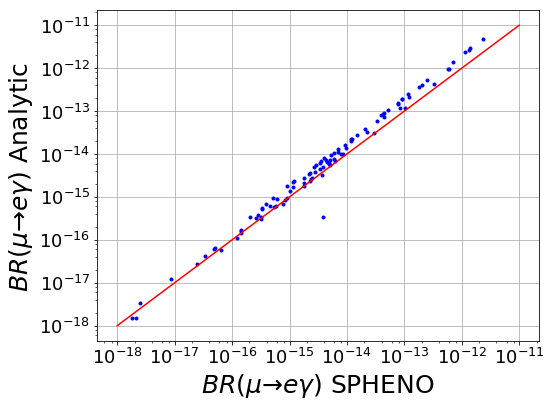

In [58]:
plt.figure(figsize=(8,6))

#plt.loglog(xd.meg,xd.megtheoric,'co')
plt.loglog(xd.meg, xd.megtheoric,'b.')

a = np.linspace(1e-18,1e-11,10)
plt.plot(a,a,'r-')

plt.xlabel(r'$BR(\mu\to e\gamma)$ SPHENO ',size=25)
plt.ylabel(r'$BR(\mu\to e\gamma)$ Analytic ',size=25)

plt.grid()

plt.tight_layout()
#plt.savefig('plots/muegamma.pdf')

In [48]:
xd[['mFr1','ms02']]

,mFr1,ms02
0,200.835033,1419.26894
1,200.811712,1419.11907
2,200.818730,1419.11988
3,200.810593,1419.13219
4,200.823048,1419.13562
5,200.817709,1419.25296
6,200.838538,1419.14415
7,200.815780,1419.14835
8,200.822421,1419.17944
9,200.821237,1419.11483
